# RELATIONSHIP ANALYSIS (ANÁLISIS DE RELACIONES)

El objetivo de esta sección es entender cómo diversas variables se correlacionan entre sí.

<br>

Se encarga de responder preguntas como:
- ¿Qué variables tienen mayor correlación con la calidad de un vino?
- ¿Qué sabores se relacionan con cierto maridaje con más frecuencia?
- ¿Existen características de un vino con alta correlación positiva o negativa entre si?

<br>

---

## Configuración General

1. Carga de librerías.
2. Seteo de estilos del notebook.
3. Ingesta del dataset.

In [14]:
import sys
import os
import statistics

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



sys.path.append(os.path.abspath(os.path.join('..', '..', 'src', 'utils')))
import utils as ut

In [15]:
# Seteo de estilos
plt.style.use("ggplot")
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (9,6)

In [16]:
wines = pd.read_csv("../../src/data/transformed/wines_clean.csv")
pd.set_option('display.max_columns', None)
wines.head(10)

,wine_link,name,year,winery,rating,rating_qty,price,body,tannis,sweetness,acidity,style,alcohol,image,ageing,black fruit,citrus,dried fruit,earthy,floral,oaky,red fruit,spices,tree fruit,tropical,vegetal,yeasty,any junk food will do,aperitif,appetizers and snacks,beef,blue cheese,cured meat,"game (deer, venison)",goat's milk cheese,lamb,lean fish,mature and hard cheese,mild and soft cheese,mushrooms,pasta,pork,poultry,"rich fish (salmon, tuna etc)",shellfish,spicy food,veal,vegetarian,Albariño,Barbera,Bonarda,Béquignol Noir,Cabernet Franc,Cabernet Sauvignon,Cereza,Chardonnay,Chenin Blanc,Criolla Grande,Garnacha,Gewürztraminer,Grenache,Grüner Veltliner,Malbec,Malvasia,Marsanne,Mencia,Merlot,Moscatel,Mourvedre,Pais,Pedro Ximenez,Petit Verdot,Pinot Gris,Pinot Noir,Riesling,Roussanne,Sangiovese,Sauvignon Blanc,Shiraz/Syrah,Sémillon,Tannat,Tempranillo,Torrontés,Trousseau,Verdejo,Viognier,Agrelo,Argentina,Brazil,Cafayate Valley,Calchaqui Valley,Campanha,Famatina,Gualtallary,La Consulta,La Rioja,Las Compuertas,Lujan de Cuyo,Lunlunta,Maipu,Mendoza,Paraje Altamira,Patagonia,Pedernal Valley,Perdriel,Rio Grande do Sul,Rio Negro,Salta,San Carlos,San Juan,San Rafael,Serra Gaúcha,Tulum Valley,Tunuyán,Tupungato,Uco Valley,Vale dos Vinhedos,Vista Flores
0,https://www.vivino.com/US/en/luigi-bosca-parai...,Paraiso,2020.0,Luigi Bosca,4.8,582.0,188.33,0.7343,0.5090,0.1361,0.4474,Argentinian Cabernet Sauvignon - Malbec,0.1409,https://images.vivino.com/thumbs/_Bf6JTwYRpSX6...,0.0000,0.3500,0.0000,0.0000,0.1250,0.0500,0.3250,0.0500,0.1000,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2015.0,Catena Zapata,4.7,297.0,675.00,0.7417,0.5583,0.1434,0.5445,Argentinian Bordeaux Blend,0.1400,https://images.vivino.com/thumbs/Yt464jw0QS-ug...,0.0241,0.2008,0.0080,0.0120,0.0964,0.0241,0.4378,0.0843,0.1004,0.0000,0.0,0.0040,0.0080,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2017.0,Catena Zapata,4.7,219.0,580.00,0.7417,0.5583,0.1434,0.5445,Argentinian Bordeaux Blend,0.1416,https://images.vivino.com/thumbs/Yt464jw0QS-ug...,0.0241,0.2008,0.0080,0.0120,0.0964,0.0241,0.4378,0.0843,0.1004,0.0000,0.0,0.0040,0.0080,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,https://www.vivino.com/US/en/monteviejo-la-vio...,La Violeta,2013.0,Monteviejo,4.7,202.0,150.00,0.7306,0.4091,0.2148,0.3661,Argentinian Uco Valley Malbec Red,0.1450,https://images.vivino.com/thumbs/FO-x9h3mQHSx9...,0.0061,0.2988,0.0000,0.0061,0.1585,0.0671,0.3110,0.0671,0.0671,0.0000,0.0,0.0061,0.0122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,https://www.vivino.com/US/en/vina-cobos-cobos-...,Cobos Volturno,2018.0,Viña Cobos,4.7,198.0,399.99,0.7105,0.4563,0.2426,0.3844,Argentinian Cabernet Sauvignon - Malbec,0.1417,https://images.vivino.com/thumbs/D1Mf1fYnRnage...,0.0258,0.2526,0.0103,0.0103,0.0773,0.0103,0.4433,0.0773,0.0876,0.0000,0.0,0.0000,0.0052

### Price-Quality (Precio-Calidad)

---

In [17]:
scaler = MinMaxScaler()
wines[["rating_scaled", "price_scaled"]] = scaler.fit_transform(wines[["rating", "price"]])
wines['price_quality_scaled'] = wines['rating_scaled'] / wines['price_scaled']
wines_filtrados = wines[wines['price'] > 0].copy()
wines_filtrados['log_price'] = np.log1p(wines_filtrados['price'])
wines_filtrados['calidad_precio_log'] = wines_filtrados['rating'] / wines_filtrados['log_price']

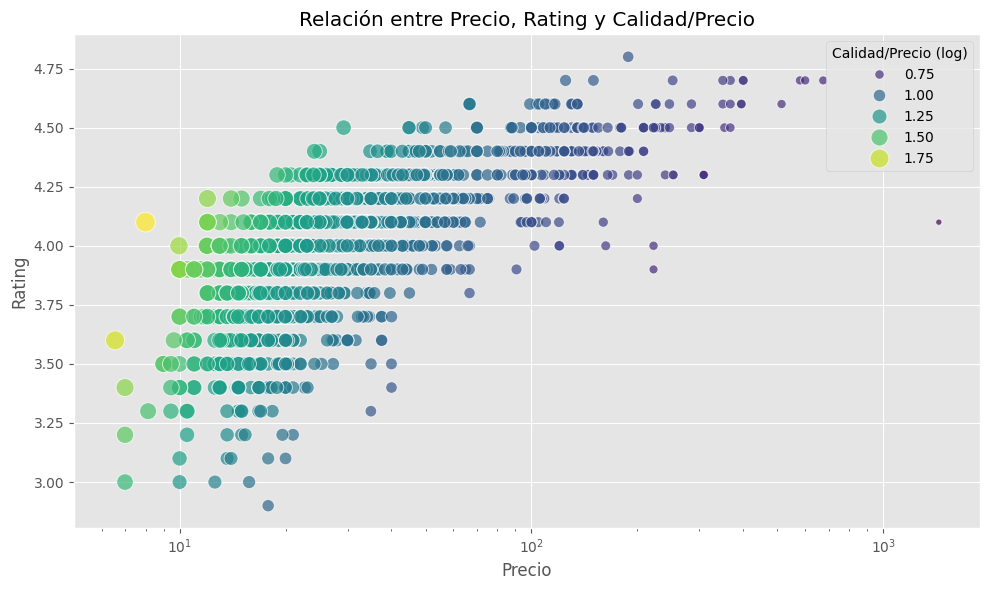

In [18]:
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(
    data=wines_filtrados,
    x="price",
    y="rating",
    hue="calidad_precio_log",
    palette="viridis",
    size="calidad_precio_log",
    sizes=(20, 200),
    alpha=0.7
)
plt.title("Relación entre Precio, Rating y Calidad/Precio")
plt.xlabel("Precio")
plt.ylabel("Rating")
plt.legend(title="Calidad/Precio (log)")
plt.xscale("log")  
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wines, x='price_scaled', y='rating_scaled', hue='price_quality_scaled',
                palette='viridis', size='price_quality_scaled', sizes=(20, 200), alpha=0.7)

plt.title('Relación entre Precio y Rating (color = calidad/precio)')
plt.xlabel('Precio')
plt.ylabel('Rating')
plt.legend(title='Calidad/Precio')
plt.grid(True)
plt.show()


## Relaciones entre caracteristicas de los vinos y maridajes

- Relaciones entre perfiles de sabor y maridajes
- Notas de sabor más frecuentes y su relación con maridajes
- Patrones entre tipos de uva  más comunes y maridajes

<br>
<br>

---

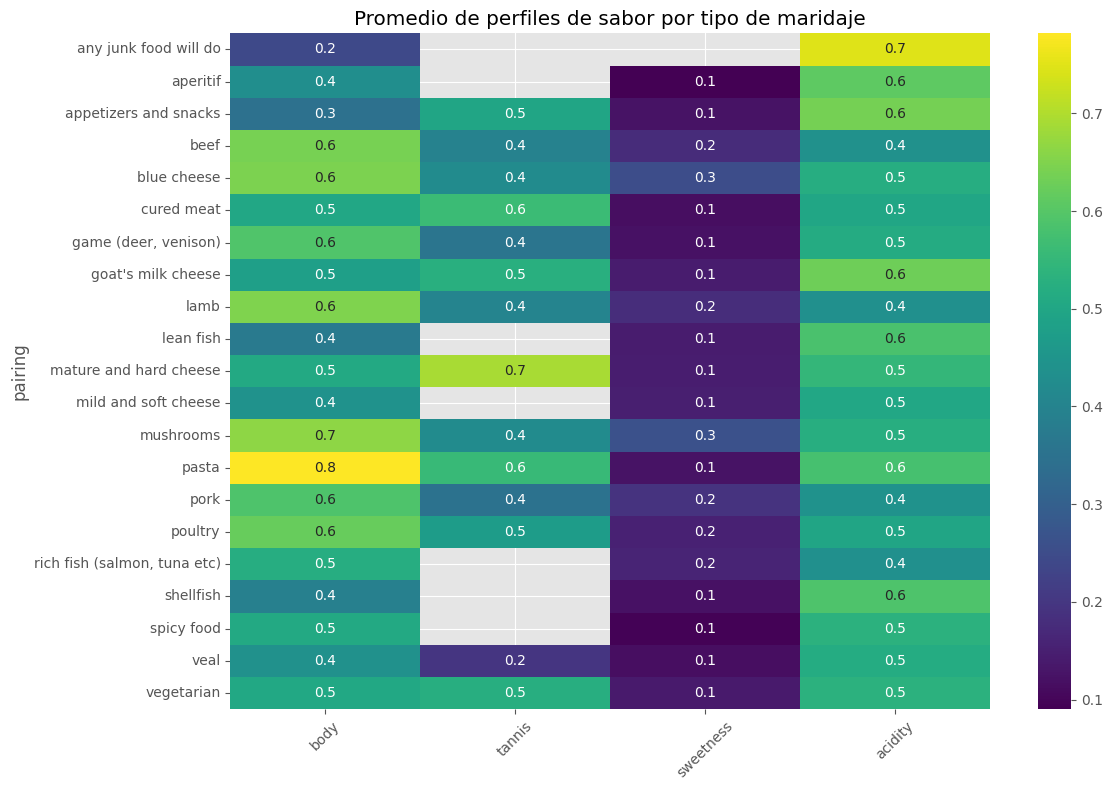

In [20]:
taste_cols = ['body', 'tannis', 'sweetness', 'acidity']

pairing_cols = [
    'any junk food will do', 'aperitif', 'appetizers and snacks', 'beef', 'blue cheese',
    'cured meat', 'game (deer, venison)', "goat's milk cheese", 'lamb', 'lean fish',
    'mature and hard cheese', 'mild and soft cheese', 'mushrooms', 'pasta', 'pork',
    'poultry', 'rich fish (salmon, tuna etc)', 'shellfish', 'spicy food', 'veal', 'vegetarian'
]
melted = wines.melt(id_vars=taste_cols, 
                    value_vars=pairing_cols,
                    var_name='pairing',
                    value_name='is_present')

melted = melted[melted['is_present'] == 1]

taste_by_pairing = melted.groupby('pairing')[taste_cols].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(taste_by_pairing, annot=True, cmap="viridis", fmt=".1f")
plt.title("Promedio de perfiles de sabor por tipo de maridaje")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



- ¿Hay maridajes correlacionados entre si?

In [ ]:
pairing_cols = [
    'any junk food will do', 'aperitif', 'appetizers and snacks', 'beef', 'blue cheese',
    'cured meat', 'game (deer, venison)', "goat's milk cheese", 'lamb', 'lean fish',
    'mature and hard cheese', 'mild and soft cheese', 'mushrooms', 'pasta', 'pork',
    'poultry', 'rich fish (salmon, tuna etc)', 'shellfish', 'spicy food', 'veal', 'vegetarian'
]

notes_cols = [
    'ageing', 'black fruit', 'citrus', 'dried fruit', 'earthy', 'floral', 'oaky', 'red fruit',
    'spices', 'tree fruit', 'tropical', 'vegetal', 'yeasty',
]

melted_notes = wines.melt(id_vars=notes_cols, 
                          value_vars=pairing_cols,
                          var_name='pairing',
                          value_name='is_present')


melted_notes = melted_notes[melted_notes['is_present'] == 1]
notes_by_pairing = melted_notes.groupby('pairing')[notes_cols].mean()

plt.figure(figsize=(14, 8))
sns.heatmap(notes_by_pairing, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Relación entre notas de sabor y maridajes")
plt.xlabel("Notas de sabor")
plt.ylabel("Tipo de maridaje")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'notes_cols' is not defined

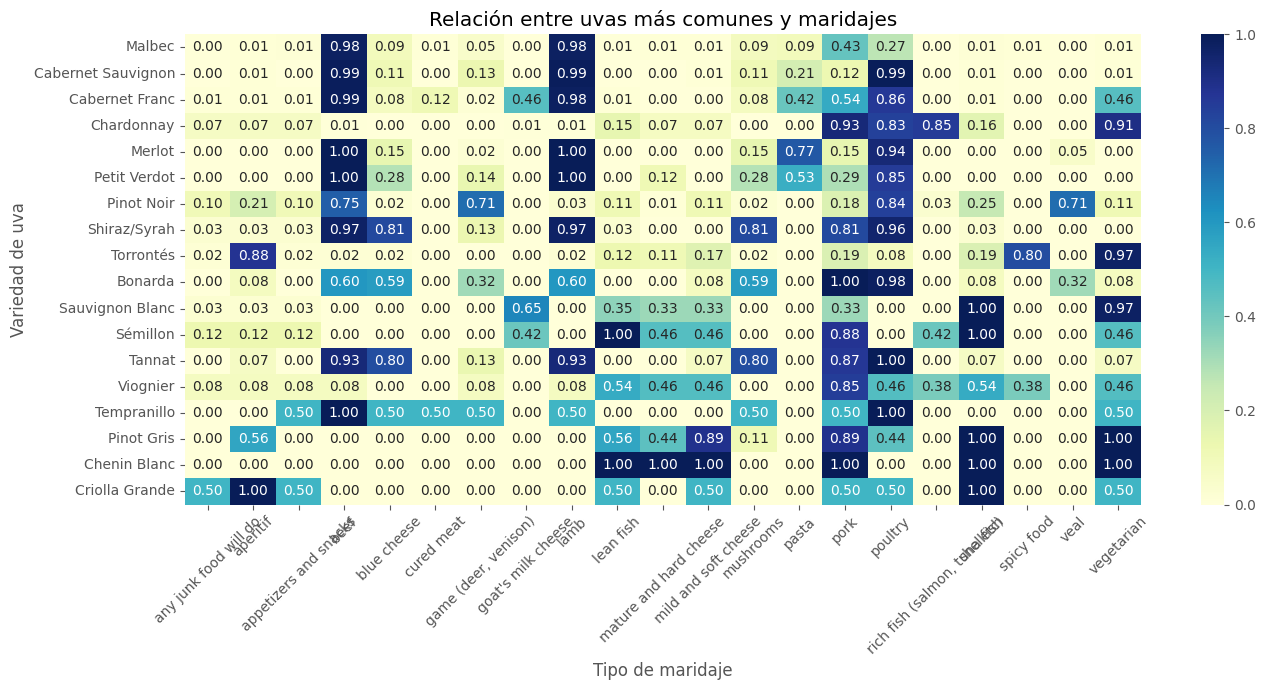

In [ ]:
grapes_melted = wines.melt(id_vars=pairing_cols,
                           value_vars=grape_cols,
                           var_name='grape',
                           value_name='is_grape')


grapes_melted = grapes_melted[grapes_melted['is_grape'] == 1]
grape_pairing_freq = grapes_melted.groupby('grape')[pairing_cols].mean()
top_grapes = wines[grape_cols].sum().sort_values(ascending=False).head(18).index.tolist()
heatmap_data = grape_pairing_freq.loc[top_grapes]

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Relación entre uvas más comunes y maridajes")
plt.xlabel("Tipo de maridaje")
plt.ylabel("Variedad de uva")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
